In [1]:
lista_acoes = ['BOVA11.SA']               
init_extract_date = '2010-6-30'
end_extract_date = '2021-11-10'
lookback = 5

str_colunas_sem=['1','2','3','4']

In [2]:
# Ingerindo dados do IBOVA 
from pandas_datareader._utils import RemoteDataError
import pandas as pd
from pandas_datareader import data as wb 

df = pd.DataFrame()
try:
    data = wb.DataReader(lista_acoes[0], data_source ='yahoo', start = init_extract_date, end=end_extract_date)['Adj Close']
except RemoteDataError:
    print('yahoo fora do ar')

In [3]:
# Transformar series.series em DF
	# Gerar outro df com MACD
	# https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.MACD

# Exemplo de uso do TA:
# https://www.youtube.com/watch?v=s3KIV-WaNuQ

df = pd.DataFrame([data])

In [4]:
df = data.to_frame().T

In [5]:
df = pd.DataFrame(data, columns=['date','close'])

In [6]:
df.head()

,date,close


In [7]:
df.isna().sum()

date     0.0
close    0.0
dtype: float64

In [8]:
for col in df.columns():
		print(col)

TypeError: 'Index' object is not callable

In [ ]:
df = df['date','close']

InvalidIndexError: ('date', 'close')

In [ ]:
df = pd.DataFrame(df)


In [ ]:
df.head

<bound method NDFrame.head of Date
2010-06-30     60.369999
2010-07-01     60.619999
2010-07-02     60.900002
2010-07-05     60.389999
2010-07-06     61.599998
                 ...    
2021-11-04     99.650002
2021-11-05    100.809998
2021-11-08    100.830002
2021-11-09    101.389999
2021-11-10    102.019997
Name: Adj Close, Length: 2816, dtype: float64>

In [ ]:
# Pegando o indicador MACD
from ta import trend 

df_macd = trend.macd(df_macd.iloc[0],window_fast = 26, window_sign = 9, fillna = True)

# df_macd = trend.macd(df_acoes)

NameError: name 'df_macd' is not defined

In [ ]:
df_acoes.columns

Index(['BOVA11.SA'], dtype='object')

<AxesSubplot:xlabel='Date'>

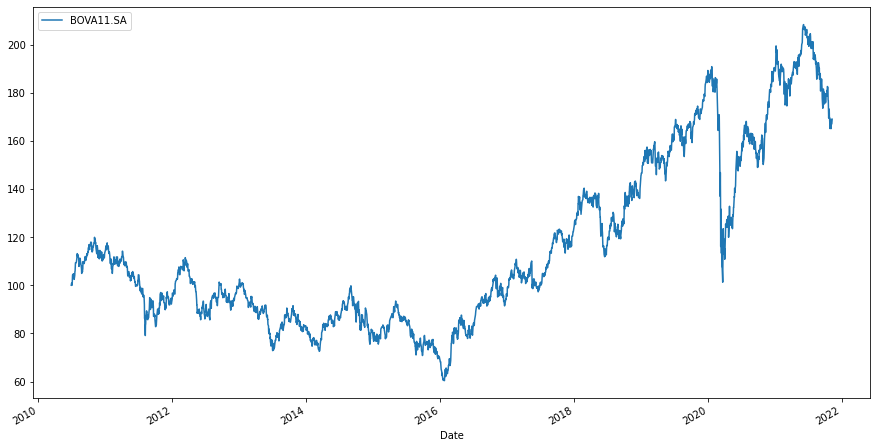

In [ ]:
(df_acoes / df_acoes.iloc[0] * 100).plot(figsize=(15,8))

In [ ]:
# Separando dados para cada linha 5 dias (Entrada para o modelo)
# lookback = Dias a olhar para tras 
dates = df_acoes.index
separados={}
for acao in df_acoes:
    prices = list(df_acoes[acao].values)
    counter_ = -1
    price_series = []
    for day in dates:
        counter_ += 1
        # if counter_ % 1000 == 0: print(counter_)
        if counter_ >= lookback:
            price_series.append(prices[counter_-lookback:counter_])
            #print(prices[counter_-lookback:counter_])

    separados[acao]=pd.DataFrame(price_series) 

In [ ]:
separados

{'BOVA11.SA':                0           1           2           3           4
 0      60.369999   60.619999   60.900002   60.389999   61.599998
 1      60.619999   60.900002   60.389999   61.599998   62.799999
 2      60.900002   60.389999   61.599998   62.799999   63.099998
 3      60.389999   61.599998   62.799999   63.099998   62.500000
 4      61.599998   62.799999   63.099998   62.500000   63.250000
 ...          ...         ...         ...         ...         ...
 2806  102.400002  100.610001   99.680000  101.519997  102.000000
 2807  100.610001   99.680000  101.519997  102.000000   99.650002
 2808   99.680000  101.519997  102.000000   99.650002  100.809998
 2809  101.519997  102.000000   99.650002  100.809998  100.830002
 2810  102.000000   99.650002  100.809998  100.830002  101.389999
 
 [2811 rows x 5 columns]}

In [ ]:
import copy
aux=copy.deepcopy(separados)

In [ ]:
aux

{'BOVA11.SA':                0           1           2           3           4
 0      60.369999   60.619999   60.900002   60.389999   61.599998
 1      60.619999   60.900002   60.389999   61.599998   62.799999
 2      60.900002   60.389999   61.599998   62.799999   63.099998
 3      60.389999   61.599998   62.799999   63.099998   62.500000
 4      61.599998   62.799999   63.099998   62.500000   63.250000
 ...          ...         ...         ...         ...         ...
 2806  102.400002  100.610001   99.680000  101.519997  102.000000
 2807  100.610001   99.680000  101.519997  102.000000   99.650002
 2808   99.680000  101.519997  102.000000   99.650002  100.809998
 2809  101.519997  102.000000   99.650002  100.809998  100.830002
 2810  102.000000   99.650002  100.809998  100.830002  101.389999
 
 [2811 rows x 5 columns]}

In [ ]:
import numpy as np
# Normalizando a base de dados:
# Implementando o ROC manualmente
# Rate of Change
# TODO: Ver de implementar quantecon para mais indicadores técnicos
porcentagens={}
for acao in aux:
    #print(aux[acao])
    resultados=[]
    for item in aux[acao].itertuples():
        row=[]
        for x in range (1,lookback+1):
            row.append(item[x])
        arr=np.array(row)
        #print (arr)
        cont=0
        porcentagem=[]
        for j in range (1,lookback):
            resp=((arr[j] / arr[0] * 100))-100
            #print (resp)
            #print ("\n",arr[j])
            porcentagem.append(resp)

        #print("\n")
        resultados.append(porcentagem)
        porcentagens[acao]=pd.DataFrame(columns=str_colunas_sem,data=resultados)

In [ ]:
porcentagens

{'BOVA11.SA':              1         2         3         4
 0     0.414113  0.877924  0.033130  2.037435
 1     0.461898 -0.379412  1.616627  3.596173
 2    -0.837442  1.149420  3.119865  3.612474
 3     2.003641  3.990727  4.487496  3.493957
 4     1.948053  2.435065  1.461041  2.678574
 ...        ...       ...       ...       ...
 2806 -1.748048 -2.656251 -0.859380 -0.390626
 2807 -0.924362  0.904479  1.381572 -0.954179
 2808  1.845903  2.327448 -0.030095  1.133625
 2809  0.472817 -1.841997 -0.699369 -0.679664
 2810 -2.303920 -1.166669 -1.147057 -0.598040
 
 [2811 rows x 4 columns]}

In [ ]:
df = pd.DataFrame([porcentagens])

In [ ]:
porcentagens

{'BOVA11.SA':              1         2         3         4
 0     0.414113  0.877924  0.033130  2.037435
 1     0.461898 -0.379412  1.616627  3.596173
 2    -0.837442  1.149420  3.119865  3.612474
 3     2.003641  3.990727  4.487496  3.493957
 4     1.948053  2.435065  1.461041  2.678574
 ...        ...       ...       ...       ...
 2806 -1.748048 -2.656251 -0.859380 -0.390626
 2807 -0.924362  0.904479  1.381572 -0.954179
 2808  1.845903  2.327448 -0.030095  1.133625
 2809  0.472817 -1.841997 -0.699369 -0.679664
 2810 -2.303920 -1.166669 -1.147057 -0.598040
 
 [2811 rows x 4 columns]}

In [ ]:
porcentagens.keys()

dict_keys(['BOVA11.SA'])

In [ ]:
# df = pd.DataFrame.from_dict(porcentagens,orient='index',columns=['teste'])
# Transformando dict em dataframe [quebrado]
df = pd.DataFrame(list(porcentagens.items()), columns=['DateValue','teste'])

In [ ]:
df.count()

DateValue    1
teste        1
dtype: int64

In [ ]:
df.head()

,DateValue,teste
0,BOVA11.SA,1 2 3 4 0...


In [ ]:
porcentagens

{'BOVA11.SA':              1         2         3         4
 0     0.414113  0.877924  0.033130  2.037435
 1     0.461898 -0.379412  1.616627  3.596173
 2    -0.837442  1.149420  3.119865  3.612474
 3     2.003641  3.990727  4.487496  3.493957
 4     1.948053  2.435065  1.461041  2.678574
 ...        ...       ...       ...       ...
 2806 -1.748048 -2.656251 -0.859380 -0.390626
 2807 -0.924362  0.904479  1.381572 -0.954179
 2808  1.845903  2.327448 -0.030095  1.133625
 2809  0.472817 -1.841997 -0.699369 -0.679664
 2810 -2.303920 -1.166669 -1.147057 -0.598040
 
 [2811 rows x 4 columns]}

In [ ]:
import csv
# tentando salvar o dict em csv
with open('ibovRoc.csv','wb') as f:
    w = csv.writer(f)
    # w.writerow(porcentagens.keys())
    w.writerow(porcentagens.values())

TypeError: a bytes-like object is required, not 'str'

In [ ]:
len(porcentagens)

1